# Assignment Week 15
## Group Assignment (Group 10)

#### 1. Use the finite difference method to solve the given boundary problem using step sizes $h=0.1$ and $h=0.01.$ Plot your two approximate solutions and the actual solutions on the same coordinate system.

#### (1) $x^{\prime\prime}=2x^{\prime}-x+t^{2}-1$ over $\left[  0,1\right]$ with $x\left(  0\right)  =5$ and $x\left(  1\right)  =10,$ $x\left(  t\right) =t^{2}+4t+5$.

Solve
$$
\left[
\begin{array}
\\-2+h^2 & 1-h
\\1+h & -2+h^2 & 1-h
\\&1+h & -2+h^2 & 1-h
\\&&&\ddots
\\&&&1+h & -2+h^2 & 1-h
\\&&&&1+h&-2+h^2
\end{array}
\right]
\left[
\begin{array}
\\x_1
\\x_2
\\x_3
\\\vdots
\\x_{N-1}
\end{array}
\right]=
\left[
\begin{array}
\\h^2(t_1^2-1)-(1+h)x_0
\\h^2(t_2^2-1)
\\h^2(t_3^2-1)
\\\vdots
\\h^2(t_{N-1}^2-1)-(1-h)x_N
\end{array}
\right]
$$

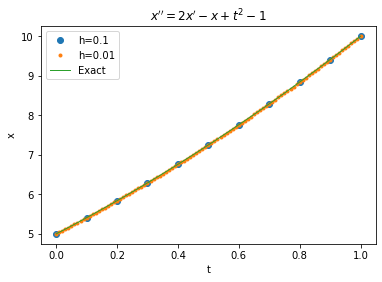

In [78]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def BVP1(h):
    xLow = 5
    xHigh = 10
    t = np.arange(0, 1+h, h)
    N = len(t) - 1
    
    A = (-2 + h**2) * np.eye(N-1) + (1 - h) * np.eye(N-1, k=1) + (1 + h) * np.eye(N-1, k=-1)
    
    b = np.array([h**2 * (t[i]**2 - 1) for i in range(1, N)])
    b[0] -= (1 + h) * xLow
    b[-1] -= (1 - h) * xHigh
    
    x = np.linalg.solve(A, b)
    x = np.append(xLow, x)
    x = np.append(x, xHigh)
    
    return t, x

t1, x1 = BVP1(h=0.1)
t2, x2 = BVP1(h=0.01)

plt.title(r'$x^{\prime\prime}=2x^{\prime}-x+t^{2}-1$')
plt.plot(t1, x1, 'o')
plt.plot(t2, x2, '.')
t = np.linspace(0, 1, 1000)
plt.plot(t, t**2 + 4 * t + 5, '-', lw=1)
plt.legend(['h=0.1', 'h=0.01', 'Exact'])
plt.xlabel('t')
plt.ylabel('x')
plt.show()

#### (2) $x^{\prime\prime}+\left(  1/t\right)  x^{\prime}+(1-1/\left(
   4t^{2}\right)  )x=0$ over $\left[  1,6\right]$ with $x\left(  1\right)  =1$ and $x\left(  6\right)  =0,$ $x\left(  t\right)  =\dfrac{0.2913843206\cos   \left(  t\right)  +1.01299385\sin\left(  t\right)  }{\sqrt{t}}$.

Solve
$$
\left[
\begin{matrix}
-2-h^2(\frac{1}{4t_1^2}-1) & 1+\frac{h}{2t_1}
\\1-\frac{h}{2t_2} & -2-h^2(\frac{1}{4t_2^2}-1) & 1+\frac{h}{2t_2}
\\&&\ddots
\\&& 1-\frac{h}{2t_{N-2}} & -2-h^2(\frac{1}{4t_{N-2}^2}-1) & 1+\frac{h}{2t_{N-2}}
\\&&& 1-\frac{h}{2t_{N-1}} & -2-h^2(\frac{1}{4t_{N-1}^2}-1)
\end{matrix}
\right]
\left[
\begin{array}
\\x_1
\\x_2
\\x_3
\\\vdots
\\x_{N-1}
\end{array}
\right]=
\left[
\begin{matrix}
-1+\frac{h}{2t_1}
\\0
\\0
\\\vdots
\\0
\end{matrix}
\right]
$$

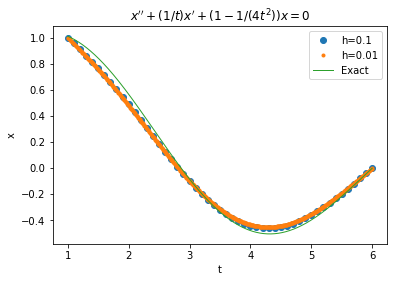

In [79]:
def BVP2(h):
    xLow = 1
    xHigh = 0
    t = np.arange(1, 6+h, h)
    N = len(t) - 1
    
    a = np.array([-2 - h**2 * (1 / 4 / t[i]**2 - 1) for i in range(1, N)])
    c = np.array([1 - h / 2 / t[i] for i in range(2, N)])
    d = np.array([1 + h / 2 / t[i] for i in range(2, N)])
    A = np.diag(a) + np.diag(c, -1) + np.diag(d, 1)
    
    b = np.zeros(N-1)
    b[0] = -1 + h / 2 / t[1]

    x = np.linalg.solve(A, b)
    x = np.append(xLow, x)
    x = np.append(x, xHigh)
    
    return t, x

t1, x1 = BVP2(h=0.1)
t2, x2 = BVP2(h=0.01)

plt.title(r'$x^{\prime\prime}+\left(  1/t\right)  x^{\prime}+(1-1/\left(4t^{2}\right))x=0$')
plt.plot(t1, x1, 'o')
plt.plot(t2, x2, '.')
t = np.linspace(1, 6, 1000)
xt = (0.2913843206*np.cos(t) + 1.01299385*np.sin(t)) / np.sqrt(t)
plt.plot(t, xt, '-', lw=1)
plt.legend(['h=0.1', 'h=0.01', 'Exact'])
plt.xlabel('t')
plt.ylabel('x')
plt.show()

#### 3. Apply the matrix representation method to solve Morse oscillator. The one-dimensional time-independent Schrödinger equation is given as: 
$$
-\frac{\hbar^2}{2m}\frac{d^2\psi(x)}{dx^2}+V(x)\psi(x)=E\psi(x)
$$
#### where Morse potential is defined as
$$
V(x)=D(1-e^{-\beta x})^2
$$
#### The analytical solutions are  determined as
$$\begin{aligned}
E_n & = \hbar\omega_0\left(n+\frac{1}{2}\right)-\frac{\hbar^2\omega_0^2}{4D}\left(n+\frac{1}{2}\right)^2,\quad n=0,1,\cdots\\
\omega_0^2&=\frac{2D\beta^2}{m}
\end{aligned}$$

#### (1) Set $m=1$, $D=1$, $\beta=0.3$. Please write the script to calculate the five lowest energies numerically.  How do the results change with the increase of the size of the matrices? 

#### (2) Please plot the corresponding wave functions of the five lowest-energy states.